In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

In [2]:
data_mat = pd.read_csv('student-mat.csv')
data_por = pd.read_csv('student-por.csv')

In [3]:
print(data_mat.shape)
print(data_por.shape)

(395, 33)
(649, 33)


In [8]:
print(data_mat.describe().T)
print('--------------------------------------------------------------------')
print(data_por.describe().T)

            count       mean       std   min   25%   50%   75%   max
age         395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
Medu        395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
Fedu        395.0   2.521519  1.088201   0.0   2.0   2.0   3.0   4.0
traveltime  395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime   395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures    395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
famrel      395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
freetime    395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
goout       395.0   3.108861  1.113278   1.0   2.0   3.0   4.0   5.0
Dalc        395.0   1.481013  0.890741   1.0   1.0   1.0   2.0   5.0
Walc        395.0   2.291139  1.287897   1.0   1.0   2.0   3.0   5.0
health      395.0   3.554430  1.390303   1.0   3.0   4.0   5.0   5.0
absences    395.0   5.708861  8.003096   0.0   0.0   4.0   8.0  75.0
G1          395.0  10.908861  3.31

In [13]:
data_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
data_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [14]:
data = pd.merge(data_mat,data_por,how='outer')

In [15]:
data.shape

(1044, 33)

In [16]:
data.isnull().sum(axis=0)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [18]:
df = pd.get_dummies(data)
df.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False
5,16,4,3,1,2,0,5,4,2,1,...,False,True,False,True,False,True,False,True,True,False
6,16,2,2,1,2,0,4,4,4,1,...,True,False,False,True,False,True,False,True,True,False
7,17,4,4,2,2,0,4,1,4,1,...,True,False,False,True,False,True,True,False,True,False
8,15,3,2,1,2,0,4,2,2,1,...,True,False,False,True,False,True,False,True,True,False
9,15,3,4,1,2,0,5,5,1,1,...,False,True,False,True,False,True,False,True,True,False


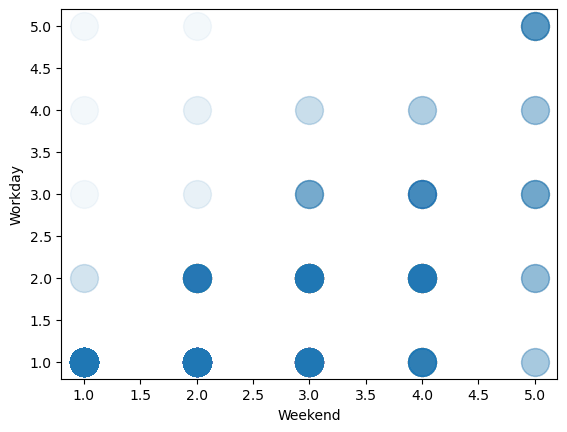

In [19]:
weekend = df['Walc']
weekday = df['Dalc']
t = weekend
plt.scatter(data['Walc'], data['Dalc'], alpha=.05, s=400)
plt.xlabel('Weekend')
plt.ylabel('Workday')
plt.show()

In [20]:
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [21]:
cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

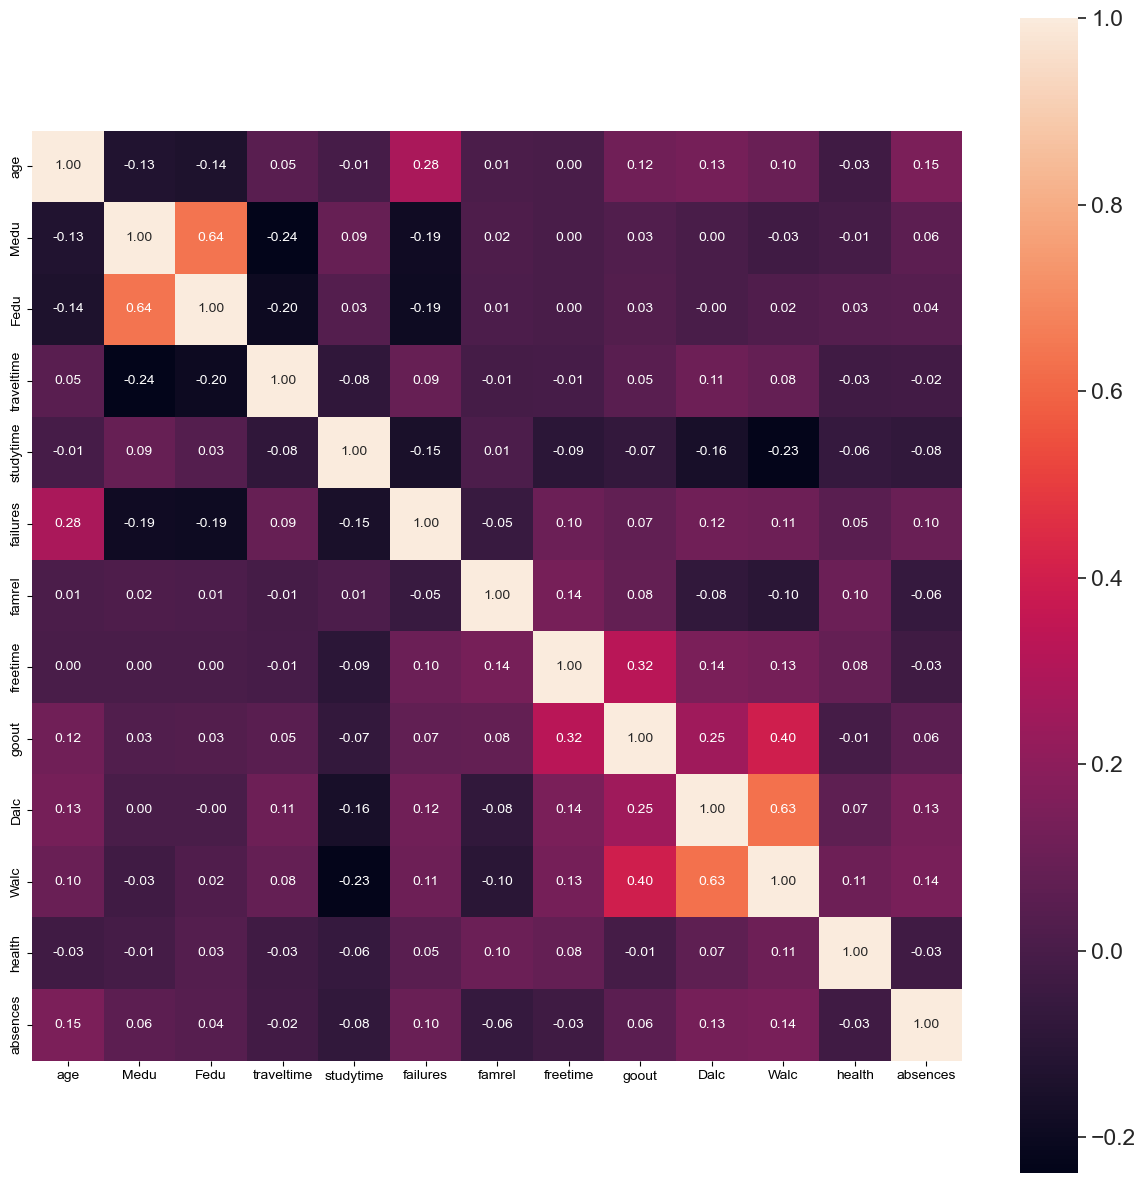

In [23]:
cm = np.corrcoef(data[cols].values.T)
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 10},
            yticklabels=cols,
            xticklabels=cols,
            ax=ax)
plt.show()

<Axes: >

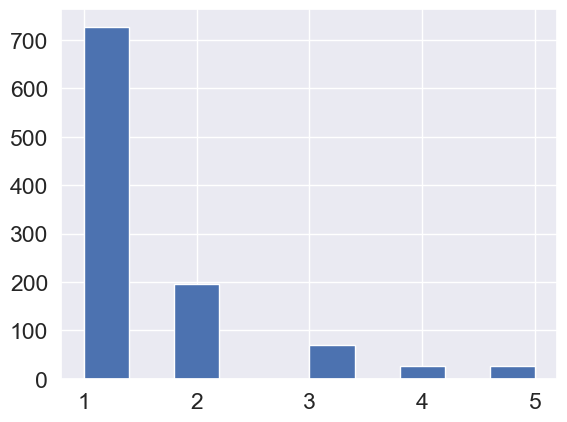

In [26]:
df['Dalc'].hist()

<Axes: >

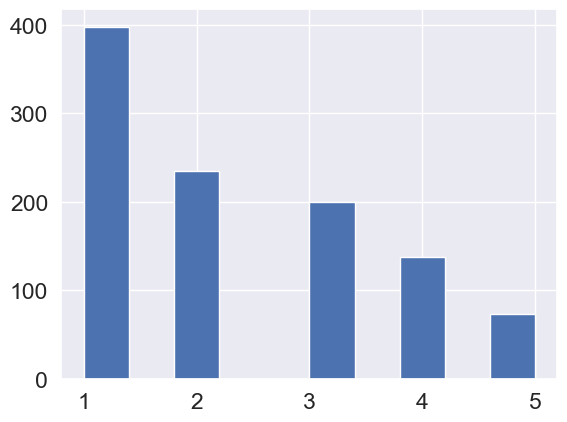

In [25]:
df['Walc'].hist()

In [27]:
df['Walc_bin'] = (df['Walc'] > 3).astype(int)
df['Dalc_bin'] = (df['Dalc'] > 1).astype(int)

np.random.seed()

#pick 80% of the sample randomly to be in the training sample
in_samp = np.random.rand(df.shape[0]) < 0.8

train_df = df[in_samp]
test_df = df[~in_samp]

In [28]:
test_df.size / df.size

0.18295019157088122

Accuracy: 0.680628272251309


C:\Users\tomar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


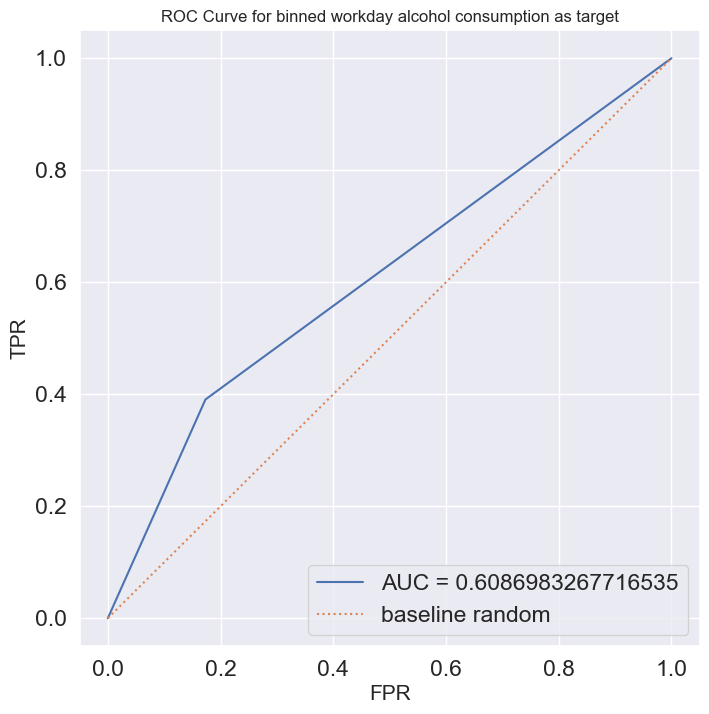

In [29]:
lr = linear_model.LogisticRegression(C=1e30, multi_class='ovr')
lr.fit(train_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1), train_df.Dalc_bin)
pred = lr.predict(test_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1))

print('Accuracy: ' + str(lr.score(test_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1), test_df.Dalc_bin)))

fpr, tpr, thresholds = metrics.roc_curve(test_df[['Dalc_bin']], pred)
auc_lr = metrics.roc_auc_score(test_df[['Dalc_bin']], pred)

plt.figure(figsize = (8,8))
plt.plot(fpr,tpr,label='AUC = ' + str(auc_lr))
plt.plot(fpr,fpr,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('ROC Curve for binned workday alcohol consumption as target', fontsize = 12)
plt.legend(loc = 4)

Accuracy: 0.8324607329842932


C:\Users\tomar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


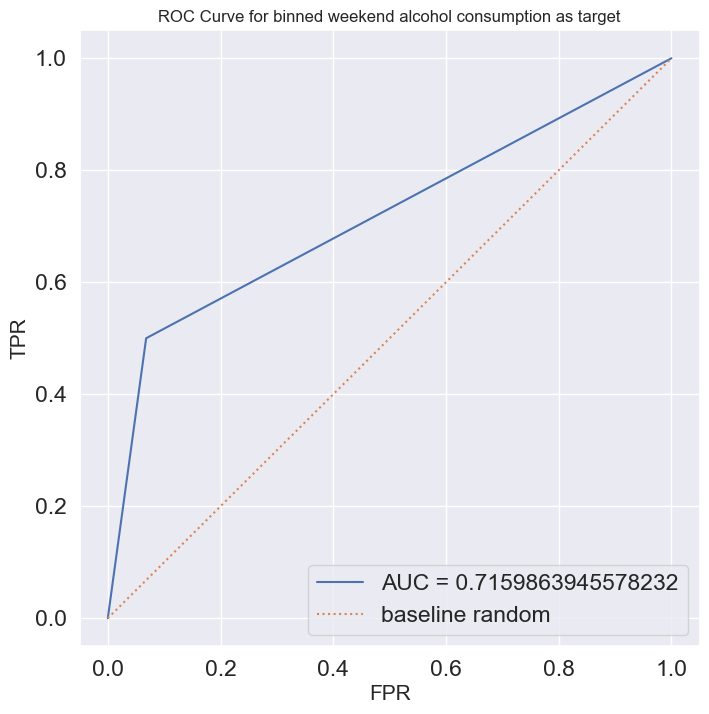

In [30]:
lr = linear_model.LogisticRegression(C=1e30, multi_class='ovr')
lr.fit(train_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1), train_df.Walc_bin)
pred = lr.predict(test_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1))

print('Accuracy: ' + str(lr.score(test_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1), test_df.Walc_bin)))

fpr, tpr, thresholds = metrics.roc_curve(test_df[['Walc_bin']], pred)
auc_lr = metrics.roc_auc_score(test_df[['Walc_bin']], pred)

plt.figure(figsize = (8,8))
plt.plot(fpr,tpr,label='AUC = ' + str(auc_lr))
plt.plot(fpr,fpr,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('ROC Curve for binned weekend alcohol consumption as target', fontsize = 12)
plt.legend(loc = 4)

In [31]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

X_train = train_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1)
Y_train = train_df[['Dalc_bin', 'Walc_bin']]

X_test = test_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1)
Y_test = test_df[['Dalc_bin', 'Walc_bin']]

MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, Y_train).predict(X_test)
print('R^2 = ' + str(MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, Y_train).score(X_test, Y_test)))

R^2 = 0.26571077375764857


In [32]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

X_train = train_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1)
Y_train = train_df[['Dalc', 'Walc']]

X_test = test_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1)
Y_test = test_df[['Dalc', 'Walc']]

#MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, Y_train).predict(X_test)
print('R^2 = ' + str(MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, Y_train).score(X_test, Y_test)))

R^2 = 0.2553516584774737


In [33]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
pred = multi_target_forest.fit(X_train, Y_train).predict(X_test)
print('Accuracy = ' + str(multi_target_forest.fit(X_train, Y_train).score(X_test, Y_test)))

Accuracy = 0.6178010471204188
